In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

In [6]:
X,y=make_moons(n_samples=1000,noise=0.4)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

log_reg=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC(probability=True)

voting_clf=VotingClassifier(
    estimators=[("lr",log_reg), ("rf",rnd_clf), ("svc",svm_clf)],
    voting="soft")
voting_clf.fit(X_train,y_train)

for clf in (log_reg,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.776
RandomForestClassifier 0.824
SVC 0.824
VotingClassifier 0.828


In [21]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                         n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,
                         oob_score=True)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(bag_clf.oob_score_)

0.868
0.86


In [22]:
bag_clf.oob_decision_function_

array([[0.96803653, 0.03196347],
       [0.97453704, 0.02546296],
       [0.91990847, 0.08009153],
       ...,
       [0.06772009, 0.93227991],
       [0.25462963, 0.74537037],
       [0.80974478, 0.19025522]])

In [23]:
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf=rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.864


In [27]:
ext_clf=ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
ext_clf.fit(X_train,y_train)
y_pred_ext=ext_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_ext))

0.876


In [29]:
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09934422344957387
sepal width (cm) 0.0259621951174956
petal length (cm) 0.4251900067595551
petal width (cm) 0.44950357467337543


In [37]:
ada_clf=AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1),n_estimators=200,
algorithm="SAMME.R",learning_rate=0.15)
ada_clf.fit(X_train,y_train)
y_pred_ada=ada_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_ada))

0.856


In [10]:
#podobne do gradient boosting regression tree
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)
y2=y-tree_reg1.predict(X)

print(np.sqrt(mean_squared_error(y,tree_reg1.predict(X))))

tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)
y3=y2-tree_reg2.predict(X)

print(np.sqrt(mean_squared_error(y,sum(tree.predict(X) for tree in (tree_reg1,tree_reg2)))))

tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

y_pred=sum(tree.predict(X) for tree in (tree_reg1,tree_reg2,tree_reg3))
print(np.sqrt(mean_squared_error(y,y_pred)))

0.34694957100623114
0.33891749204171473
0.33321600725103884


In [12]:
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
gbrt.fit(X,y)
y_pred=gbrt.predict(X)
print(np.sqrt(mean_squared_error(y,y_pred)))

0.33321600725103884


Best n_estimators=64


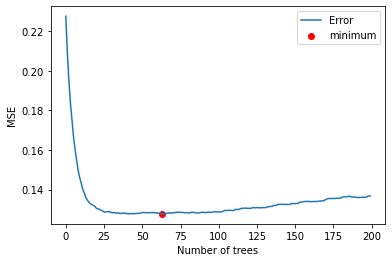

In [16]:
X_train,X_val,y_train,y_val = train_test_split(X,y)

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=200)
gbrt.fit(X_train,y_train)

errors=[mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators=np.argmin(errors)+1

print("Best n_estimators={}".format(best_n_estimators))

gbrt_best=GradientBoostingRegressor(max_depth=2,n_estimators=best_n_estimators)
gbrt_best.fit(X_train,y_train)

plt.plot(range(len(errors)),errors,label="Error")
plt.scatter(best_n_estimators-1,errors[best_n_estimators-1],c="red",label="minimum")
plt.xlabel("Number of trees")
plt.ylabel("MSE")
plt.legend()